# MACS205-TD2 solutions
## Polynomial interpolation

<h4 align="right"> Author: <i> Hicham Janati </i></h4>

### I - Divided differences and Lagrange interpolation
Consider a set of points $a \leq x_0 < \dots < x_n \leq b$. The purpose of this problem is to compute the Lagrange polynomial of a function $f$ for the set of points $(x_k)_{0 \leq k \leq n}$ denoted by $L_n f$. 

To do so, we consider the Newton basis formed by the nodal polynomials:
$$ w_k(X) = (X - x_0) \dots (X - x_{k-1}) \qquad \forall k \geq 1$$
and $w_0 = 1$.

### Part 1:
1. Show that:
$$ (\forall 1\leq k \leq n)(\exists a_k \in \mathbb{R}) \quad L_k f - L_{k-1}f = a_k w_k $$

and deduce the coefficients of $L_n f$ in the Newton basis.
2. We denote the coefficient of $w_k$ by $f_{[x_0, \dots, x_k]}$. What does $f_{[x_k]}$ correspond to ? 

3. Let $p_{k} = L_{x_0, \dots, x_{k}} f$ and  $q_{k-1} = L_{x_1, \dots, x_{k}} f$. 
Show that $r_k = p_k$ where:
$$ r_k(x) = \frac{(x - x_0)q_{k-1}(x) - (x-x_k)p_{k-1}(x)}{x_k - x_0} $$

4. Deduce the divided differences formula:
$$ f_{[x_0, \dots, x_k]} = \frac{f_{[x_1, \dots, x_k]} - f_{[x_0, \dots, x_{k-1}]}}{x_k - x_0}  $$

5. Since the choice of the interpolation point $x_0$ is arbitrary, it follows that the formula holds for all $i$:
$$  f_{[x_i, \dots, x_k]} = \frac{f_{[x_{i+1}, \dots, x_k]} - f_{[x_i, \dots, x_{k-1}]}}{x_k - x_i}  $$

Starting from an array $x = (x_0, \dots, x_{n-1})$ and $ y = (f(x_0), \dots, f(x_{n-1}))$, consider the structure:

$$F \stackrel{def}{=} \begin{pmatrix} f_{[x_0]} & & & & & \\ f_{[x_1]} & f_{[x_0, x_1]} & & & &  \\
f_{[x_2]} & f_{[x_1, x_2]} & f_{[x_0, x_1, x_2]} & & & \\
\vdots & \vdots & \vdots & &  \\
f_{[x_n]} & \dots & & & f_{[x_0, \dots, x_n]}
\end{pmatrix}
$$
Write $F_{ij}$ as a function of the sequence $f_{[x_l, \dots, x_k]}$ for some $l$ and $k$ and deduce a relationship between $F_{ij}$, $F_{i, j-1}$, $F_{i-1, j-1}$ and $(x_k)_k$.

<font color="green"><b> Answers </b></font>

**A1.** By definition of $L_kf$ and $L_{k-1}f$, we have 
$$\forall 0 \leq i < k \leq n , L_kf(x_i) = L_{k-1}f(x_i) = 0$$
thus, $\forall 1 \leq k \leq n$, the polynomial $L_kf - L_{k-1}f$ has k roots given by $(x_0, x_1, \dots, x_{k-1})$.
Therefore $L_kf - L_{k-1}f$ is of degree k and leading coefficient $a_k$. It can thus be written:
$$\forall 1 \leq k \leq n , \exists a_k \in \mathbb{R}, L_kf - L_{k-1}f = a_k \prod_{i=0}^{k-1} (X-x_i) = a_k w_k$$

Summing over $k$ leads to:
$$\sum_{k=1}^{n} [L_kf - L_{k-1}f] = L_nf - L_0f = \sum_{k=1}^{n} a_k w_k  $$
$$ \Rightarrow L_nf = \sum_{k=0}^{n} a_k w_k$$ as $w_0 = 1, \: L_0f = f(x_0)$ and we define $a_0 = f(x_0)$.

**A2.**
Since the choice for $x_0$ is arbitrary and for $k = 0,\: f_{[x_0, \dots, x_k]} = f_{[x_0]} = L_0f = f(x_0)$, we have
$$ \forall 1 \leq k \leq n, \: f_{[x_k]} = f(x_k) $$

**A3.**
To prove that $p = r$, we will use the fact that 2 polynomials are equal if and only if they have the same degree N and agree on N+1 different points, then they're equal.

It is straighforward to notice that $deg(p_k) = deg(L_{x_0, \dots, x_k}f) = k$ and $deg(r_k) = deg((x-x_0)(L_{x_1, \dots, x_k}f) - (x-x_k)(L_{x_0, \dots, x_{k-1}}f)) = 1 + deg(L_{x_1, \dots, x_k}f) = 1 + k - 1 = k$, and we have $k+1$ points (as they will agree on all $x_i$ for $i$ in $[\![0,k]\!]$)

On one hand by definition of $L_{x_0, \dots, x_k}f$:

$$ p_k(x_i) = L_{x_0, \dots, x_k}f(x_i)=f(x_i)$$ </br>
On the other hand, for $r_k(x_i) = \dfrac{(x_i-x_0)L_{x_1, \dots, x_k}f(x_i) - (x_i-x_k)L_{x_0, \dots, x_{k-1}}f(x_i)}{x_k-x_0}$, we have :
</br> if $\underline{i=0}$: 
$$r_k(x_0)=\dfrac{0 - (x_0-x_k)L_{x_0, \dots, x_{k-1}}f(x_0)}{x_k-x_0} = \dfrac{(x_k-x_0)f(x_0)}{x_k-x_0} = f(x_0) = p_k(x_0)$$
</br> if $\underline{i=k}$: 
$$r_k(x_k)=\dfrac{(x_k-x_0)L_{x_1, \dots, x_k}f(x_k) - 0}{x_k-x_0} = \dfrac{(x_k-x_0)f(x_k)}{x_k-x_0} = f(x_k) = p_k(x_k)$$
</br> otherwise, if $\underline{i \in [\![1,k-1]\!]}$: 
$$r_k(x_i)=\dfrac{(x_i-x_0)f(x_i) - (x_i-x_k)f(x_i)}{x_k-x_0} = \dfrac{(x_k-x_0)f(x_i)}{x_k-x_0} = f(x_i) = p_k(x_i)$$
So in all cases, $$\forall k \in \mathbb{R}, \forall i \in [\![0,k]\!], r_k(x_i) = p_k(x_i)$$
</br>
which, as we proved earlier, means that the two polynoms of degree k agree on k+1 points which is enough to say $$\fbox{$r=p$}$$

**A4**
Follows directly by equalizing the coefficients of both polynomials.

**A5**
It is easy to verify that $$F_{ij} = f_{[x_{i-j}, \dots, x_i]}$$
Using Q4: 

$$ F_{ij} = f_{[x_{i-j}, \dots, x_i]} = \frac{f_{[x_{i-(j-1)}, \dots, x_i]} - f_{[x_{(i-1) - (j-1)}, \dots, x_{i-1}]}}{x_i - x_{i-j}} = \frac{F_{i, j-1} - F_{i-1, j-1}}{x_i - x_{i-j}} $$


### Part 2: implementation

6. Implement a function that computes the Newton coefficients of $L_nf$.

We are only interested in the diagonal elements of F. Therefore, we can initialize the diagonal f to be the first column of the matrix F which is given by y = (f(x_0), f(x_1), ... f(x_n)) and start shifting the value of j to the right until j = i. This operation can be vectorized as follows:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def divided_differences_(x, y):
    n = len(x)
    f = y
    for ii in range(1, n):
        f[ii:] = (f[ii:] - f[ii - 1:-1]) / (x[ii:] - x[:n-ii])
    return f

In [2]:
x = np.linspace(-5., 5., 100)
y = x ** 2 - x + 3
F = divided_differences_(x, y)

7. Horner's method consists in evaluating a polynomial given its coefficients using a smart update:
$$ P(x) = a_0 + x(a_1 + x(a_2 + .... x a_n) $$

Adapt this method for a polynomial written in the Newton basis

8. Write a function that evaluates the Lagrangian polynomial and test it on the following example:

In [3]:
def evaluate(grid_for_eval, newton_coefs, x):
    n = len(x)
    s = newton_coefs[-1]
    for xx, coef in zip(x[::-1][1:], newton_coefs[::-1][1:]):
        s = coef + (grid_for_eval - xx) * s
    return s

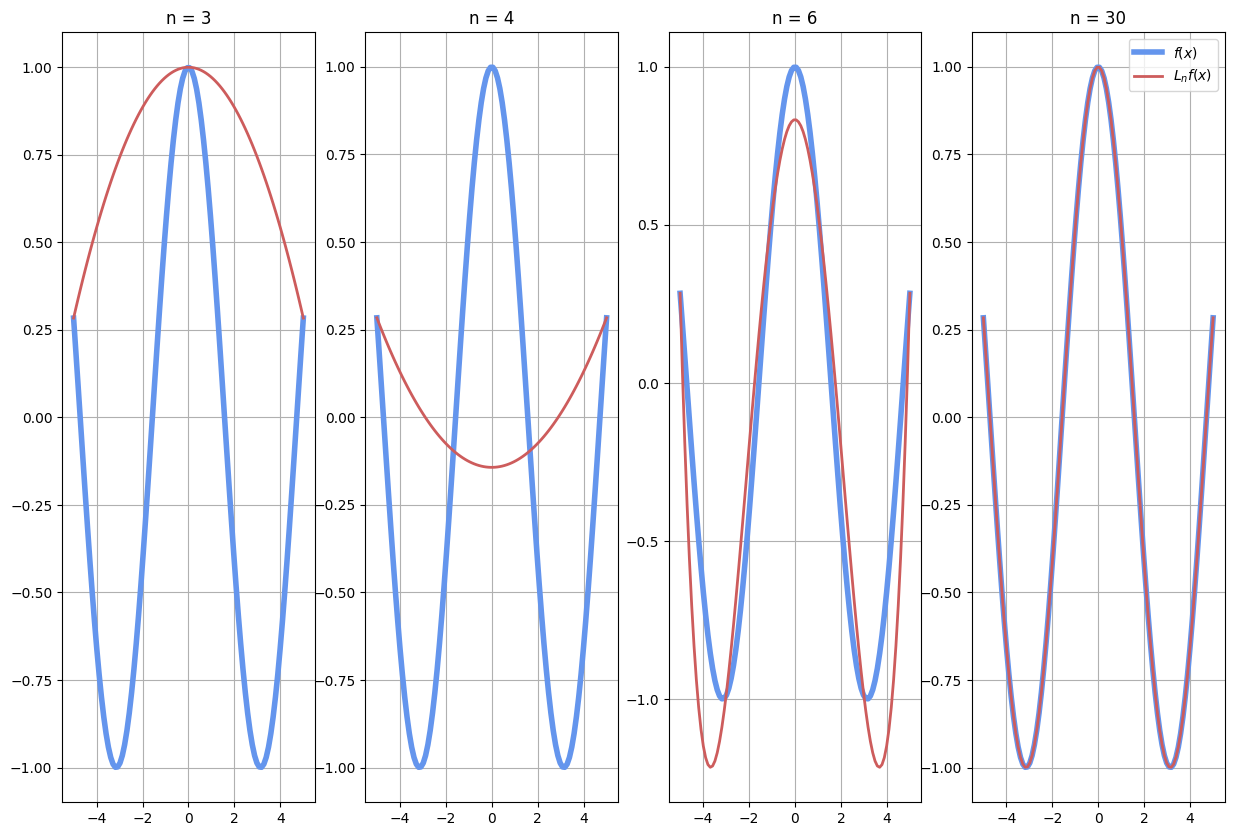

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(15, 10))
for n , ax in zip([3, 4, 6, 30], axes):
    x = np.linspace(-5., 5., n)
    f = lambda x: np.cos(x)

    y = f(x)
    grid = np.linspace(-5, 5., 100)
    f_grid = f(grid)

    newton_coefs = divided_differences_(x, y)

    interpol = evaluate(grid, newton_coefs, x)

    ax.plot(grid, f_grid, lw=4, color='cornflowerblue', label=r'$f(x)$')
    ax.plot(grid, interpol, lw=2, color='indianred', label=r'$L_nf(x)$')
    ax.grid()
    ax.set_title(f"n = {n}")
plt.legend()
plt.show()

9. Try the same test with the function: $$ f_a(x) = \frac{1}{1 + 25x^2} $$ 


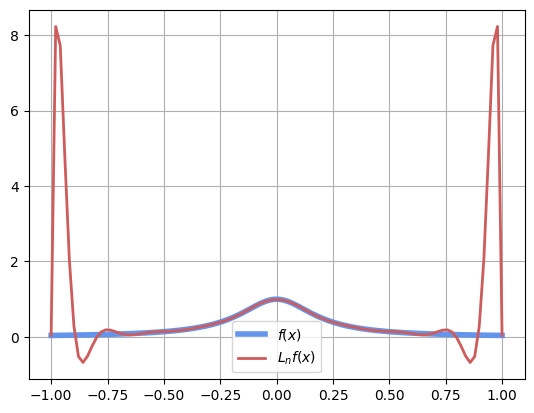

In [4]:
n = 20
x = np.linspace(-1., 1., n)
f = lambda x: 1 / (1 + 25 * x ** 2)

y = f(x)
grid = np.linspace(-1, 1., 100)
f_grid = f(grid)

newton_coefs = divided_differences_(x, y)
        
interpol = evaluate(grid, newton_coefs, x)

plt.figure()
plt.plot(grid, f_grid, lw=4, color='cornflowerblue', label=r'$f(x)$')
plt.plot(grid, interpol, lw=2, color='indianred', label=r'$L_nf(x)$')
plt.grid()
plt.legend()
plt.show()